In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
#bibliotecas de machine learning
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate, ShuffleSplit

from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn import utils
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,KFold,GroupKFold
import lightgbm as lgb
import gc


import warnings
warnings.filterwarnings('ignore')


In [ ]:
#cargar los datos
#train2016 = pd.read_csv("train_2016_v2.csv")
#train2017 = pd.read_csv("train_2017.csv")
#properties_2016 = pd.read_csv("properties_2016.csv")
#properties_2017 = pd.read_csv("properties_2017.csv")


In [2]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [8]:
train2016=pd.read_csv("/content/drive/MyDrive/datasets zillow/train_2016_v2.csv")
train2017=pd.read_csv("/content/drive/MyDrive/datasets zillow/train_2017.csv")
properties_2016=pd.read_csv("/content/drive/MyDrive/datasets zillow/properties_2016.csv")
properties_2017=pd.read_csv("/content/drive/MyDrive/datasets zillow/properties_2017.csv")

In [9]:
train2016

,parcelid,logerror,transactiondate
0,11016594,0.0276,2016-01-01
1,14366692,-0.1684,2016-01-01
2,12098116,-0.0040,2016-01-01
3,12643413,0.0218,2016-01-02
4,14432541,-0.0050,2016-01-02
...,...,...,...
90270,10774160,-0.0356,2016-12-30
90271,12046695,0.0070,2016-12-30
90272,12995401,-0.2679,2016-12-30
90273,11402105,0.0602,2016-12-30


In [10]:
train2017

,parcelid,logerror,transactiondate
0,14297519,0.025595,2017-01-01
1,17052889,0.055619,2017-01-01
2,14186244,0.005383,2017-01-01
3,12177905,-0.103410,2017-01-01
4,10887214,0.006940,2017-01-01
...,...,...,...
77608,10833991,-0.002245,2017-09-20
77609,11000655,0.020615,2017-09-20
77610,17239384,0.013209,2017-09-21
77611,12773139,0.037129,2017-09-21


In [11]:
properties_2016

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2985212,168176230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2985213,14273630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2985214,168040630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2985215,168040830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
properties_2017

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2016.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,5.0,NaN,NaN,NaN,...,1.0,NaN,660680.0,1434941.0,2016.0,774261.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,6.0,NaN,NaN,...,1.0,NaN,580059.0,1174475.0,2016.0,594416.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,1.0,NaN,196751.0,440101.0,2016.0,243350.0,5725.17,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2985212,12170430,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2985213,11422430,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2985214,17203030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2985215,14242830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


ANALISIS EXPLORATORIO INICIAL

In [13]:
#Concatenamos los datos de train:
train_2016 = train2016.merge(properties_2016)

In [14]:
train_2016

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,2016-01-01,1.0,NaN,NaN,2.0,3.0,NaN,4.0,...,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13
1,14366692,-0.1684,2016-01-01,NaN,NaN,NaN,3.5,4.0,NaN,NaN,...,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN
2,12098116,-0.0040,2016-01-01,1.0,NaN,NaN,3.0,2.0,NaN,4.0,...,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13
3,12643413,0.0218,2016-01-02,1.0,NaN,NaN,2.0,2.0,NaN,4.0,...,NaN,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,NaN,6.037296e+13
4,14432541,-0.0050,2016-01-02,NaN,NaN,NaN,2.5,4.0,NaN,NaN,...,2.0,NaN,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,NaN,6.059042e+13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90270,10774160,-0.0356,2016-12-30,1.0,NaN,NaN,1.0,1.0,NaN,4.0,...,NaN,NaN,43800.0,191000.0,2015.0,147200.0,2495.24,NaN,NaN,6.037132e+13
90271,12046695,0.0070,2016-12-30,NaN,NaN,NaN,3.0,3.0,NaN,4.0,...,NaN,NaN,117893.0,161111.0,2015.0,43218.0,1886.54,NaN,NaN,6.037301e+13
90272,12995401,-0.2679,2016-12-30,NaN,NaN,NaN,2.0,4.0,NaN,7.0,...,NaN,NaN,22008.0,38096.0,2015.0,16088.0,1925.70,Y,14.0,6.037433e+13
90273,11402105,0.0602,2016-12-30,NaN,NaN,NaN,2.0,2.0,NaN,4.0,...,NaN,NaN,132991.0,165869.0,2015.0,32878.0,2285.57,NaN,NaN,6.037601e+13


In [15]:
#Concatenamos los datos de train:
train_2017 = train2017.merge(properties_2017)

In [16]:
train_2017

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,14297519,0.025595,2017-01-01,NaN,NaN,NaN,3.5,4.0,NaN,NaN,...,NaN,NaN,485713.0,1023282.0,2016.0,537569.0,11013.72,NaN,NaN,6.059063e+13
1,17052889,0.055619,2017-01-01,NaN,NaN,NaN,1.0,2.0,NaN,NaN,...,1.0,NaN,88000.0,464000.0,2016.0,376000.0,5672.48,NaN,NaN,6.111001e+13
2,14186244,0.005383,2017-01-01,NaN,NaN,NaN,2.0,3.0,NaN,NaN,...,1.0,NaN,85289.0,564778.0,2016.0,479489.0,6488.30,NaN,NaN,6.059022e+13
3,12177905,-0.103410,2017-01-01,NaN,NaN,NaN,3.0,4.0,NaN,8.0,...,NaN,NaN,108918.0,145143.0,2016.0,36225.0,1777.51,NaN,NaN,6.037300e+13
4,10887214,0.006940,2017-01-01,1.0,NaN,NaN,3.0,3.0,NaN,8.0,...,NaN,NaN,73681.0,119407.0,2016.0,45726.0,1533.89,NaN,NaN,6.037124e+13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77608,10833991,-0.002245,2017-09-20,1.0,NaN,NaN,3.0,3.0,NaN,8.0,...,NaN,NaN,265000.0,379000.0,2016.0,114000.0,4685.34,NaN,NaN,6.037132e+13
77609,11000655,0.020615,2017-09-20,NaN,NaN,NaN,2.0,2.0,NaN,6.0,...,NaN,NaN,70917.0,354621.0,2016.0,283704.0,4478.43,NaN,NaN,6.037101e+13
77610,17239384,0.013209,2017-09-21,NaN,NaN,NaN,2.0,4.0,NaN,NaN,...,1.0,NaN,50683.0,67205.0,2016.0,16522.0,1107.48,NaN,NaN,6.111008e+13
77611,12773139,0.037129,2017-09-21,1.0,NaN,NaN,1.0,3.0,NaN,4.0,...,NaN,NaN,32797.0,49546.0,2016.0,16749.0,876.43,NaN,NaN,6.037434e+13


Conteo

In [17]:
train_2016.shape

(90275, 60)

In [18]:
train_2017.shape

(77613, 60)

Análisis de la variable objetivo

<Axes: xlabel='logerror', ylabel='Density'>

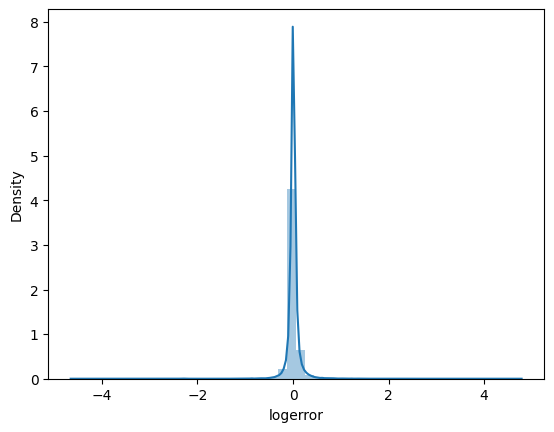

In [19]:
#Distribución de la variable objetivo
sns.distplot(train_2016['logerror'])

In [20]:
print('Skewness de la variable objetivo', train_2016['logerror'].skew())

Skewness de la variable objetivo 2.1688282902579354


<Axes: xlabel='logerror', ylabel='Density'>

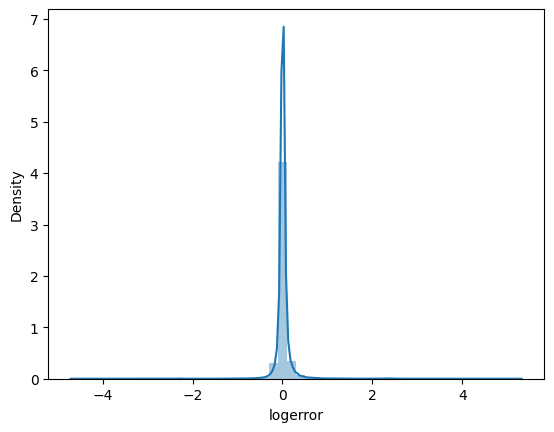

In [21]:
#Distribución de la variable objetivo
sns.distplot(train_2017['logerror'])

In [22]:
print('Skewness de la variable objetivo', train_2017['logerror'].skew())

Skewness de la variable objetivo 3.7017630459887507


Missing Values

In [23]:
#2016
k=train_2016.isna().sum()
k[k!=0]

airconditioningtypeid           61494
architecturalstyletypeid        90014
basementsqft                    90232
buildingclasstypeid             90259
buildingqualitytypeid           32911
calculatedbathnbr                1182
decktypeid                      89617
finishedfloor1squarefeet        83419
calculatedfinishedsquarefeet      661
finishedsquarefeet12             4679
finishedsquarefeet13            90242
finishedsquarefeet15            86711
finishedsquarefeet50            83419
finishedsquarefeet6             89854
fireplacecnt                    80668
fullbathcnt                      1182
garagecarcnt                    60338
garagetotalsqft                 60338
hashottuborspa                  87910
heatingorsystemtypeid           34195
lotsizesquarefeet               10150
poolcnt                         72374
poolsizesum                     89306
pooltypeid10                    89114
pooltypeid2                     89071
pooltypeid7                     73578
propertycoun

In [24]:
#Porcentaje de datos faltantes para cada variable del dataset 2016
total           = train_2016.isnull().sum().sort_values(ascending=False)
percent         = (train_2016.isnull().sum()/train_2016.isnull().count()*100).sort_values(ascending=False)
missing_train1  = pd.concat([total,percent],axis=1,keys=["Total","Percent"])
missing_train1

,Total,Percent
buildingclasstypeid,90259,99.982276
finishedsquarefeet13,90242,99.963445
storytypeid,90232,99.952368
basementsqft,90232,99.952368
yardbuildingsqft26,90180,99.894766
fireplaceflag,90053,99.754085
architecturalstyletypeid,90014,99.710883
typeconstructiontypeid,89976,99.668790
finishedsquarefeet6,89854,99.533647
decktypeid,89617,99.271116


In [25]:
#2017
e=train_2017.isna().sum()
e[e!=0]

airconditioningtypeid           52606
architecturalstyletypeid        77406
basementsqft                    77563
bathroomcnt                        34
bedroomcnt                         34
buildingclasstypeid             77598
buildingqualitytypeid           27804
calculatedbathnbr                 650
decktypeid                      76999
finishedfloor1squarefeet        71576
calculatedfinishedsquarefeet      235
finishedsquarefeet12             3690
finishedsquarefeet13            77571
finishedsquarefeet15            74586
finishedsquarefeet50            71576
finishedsquarefeet6             77227
fips                               34
fireplacecnt                    69324
fullbathcnt                       650
garagecarcnt                    52093
garagetotalsqft                 52093
hashottuborspa                  76074
heatingorsystemtypeid           28042
latitude                           34
longitude                          34
lotsizesquarefeet                8292
poolcnt     

In [26]:
#Porcentaje de datos faltantes para cada variable del dataset 2017
total           = train_2017.isnull().sum().sort_values(ascending=False)
percent         = (train_2017.isnull().sum()/train_2016.isnull().count()*100).sort_values(ascending=False)
missing_train2  = pd.concat([total,percent],axis=1,keys=["Total","Percent"])
missing_train2

,Total,Percent
buildingclasstypeid,77598,85.957353
finishedsquarefeet13,77571,85.927444
basementsqft,77563,85.918582
storytypeid,77563,85.918582
yardbuildingsqft26,77543,85.896428
fireplaceflag,77441,85.783439
architecturalstyletypeid,77406,85.744669
typeconstructiontypeid,77390,85.726945
finishedsquarefeet6,77227,85.546386
pooltypeid10,77148,85.458876


Correlación entre las diferentes variables


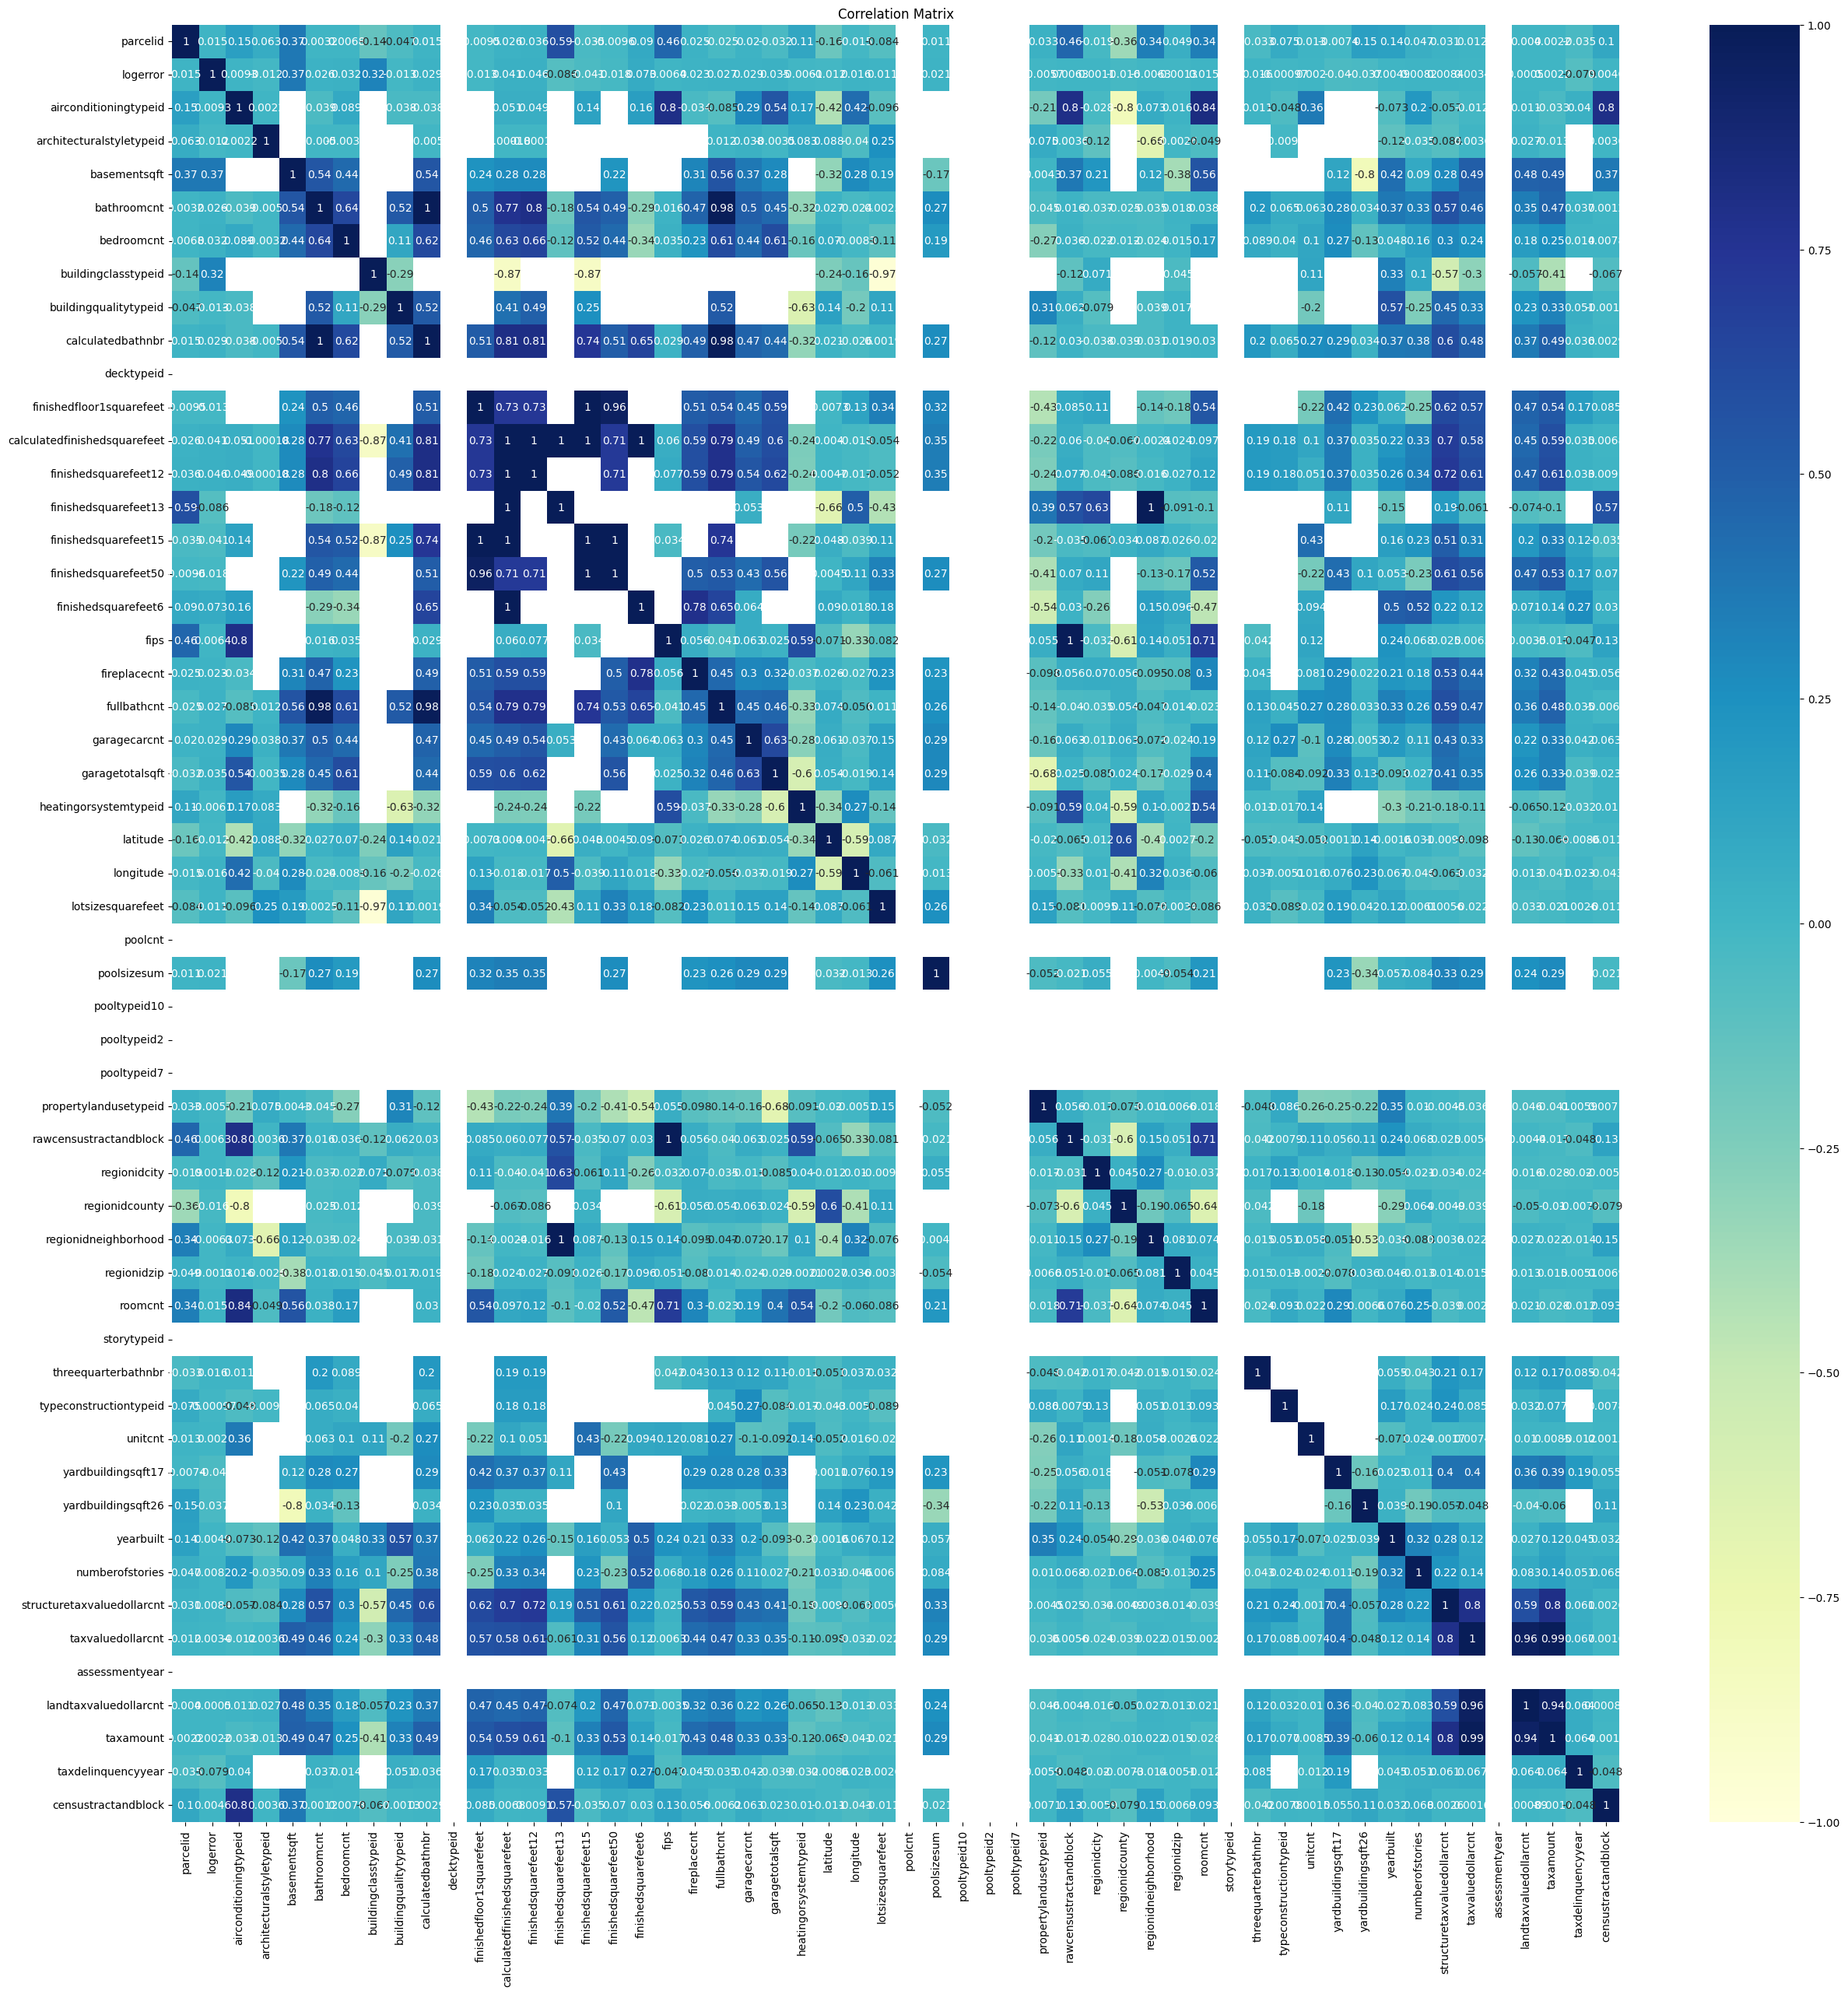

In [30]:
#Matriz de correlaciones
corr_matrix = train_2017.corr()
#Gráfico de la matriz de correlaciones
plt.figure(figsize=(30,30))
sns.heatmap(corr_matrix, annot = True, vmin = -1, vmax = 1, cmap = "YlGnBu").set_title('Correlation Matrix')
plt.show()

In [31]:
#Correlaciones de las variables con la variable objetivo
target_corr_df = pd.DataFrame(corr_matrix["logerror"].sort_values(ascending=False))
target_corr_df 

,logerror
logerror,1.000000
basementsqft,0.372067
buildingclasstypeid,0.315372
finishedsquarefeet6,0.072870
finishedsquarefeet12,0.045921
calculatedfinishedsquarefeet,0.040516
garagetotalsqft,0.035015
bedroomcnt,0.031638
calculatedbathnbr,0.029330
garagecarcnt,0.029002


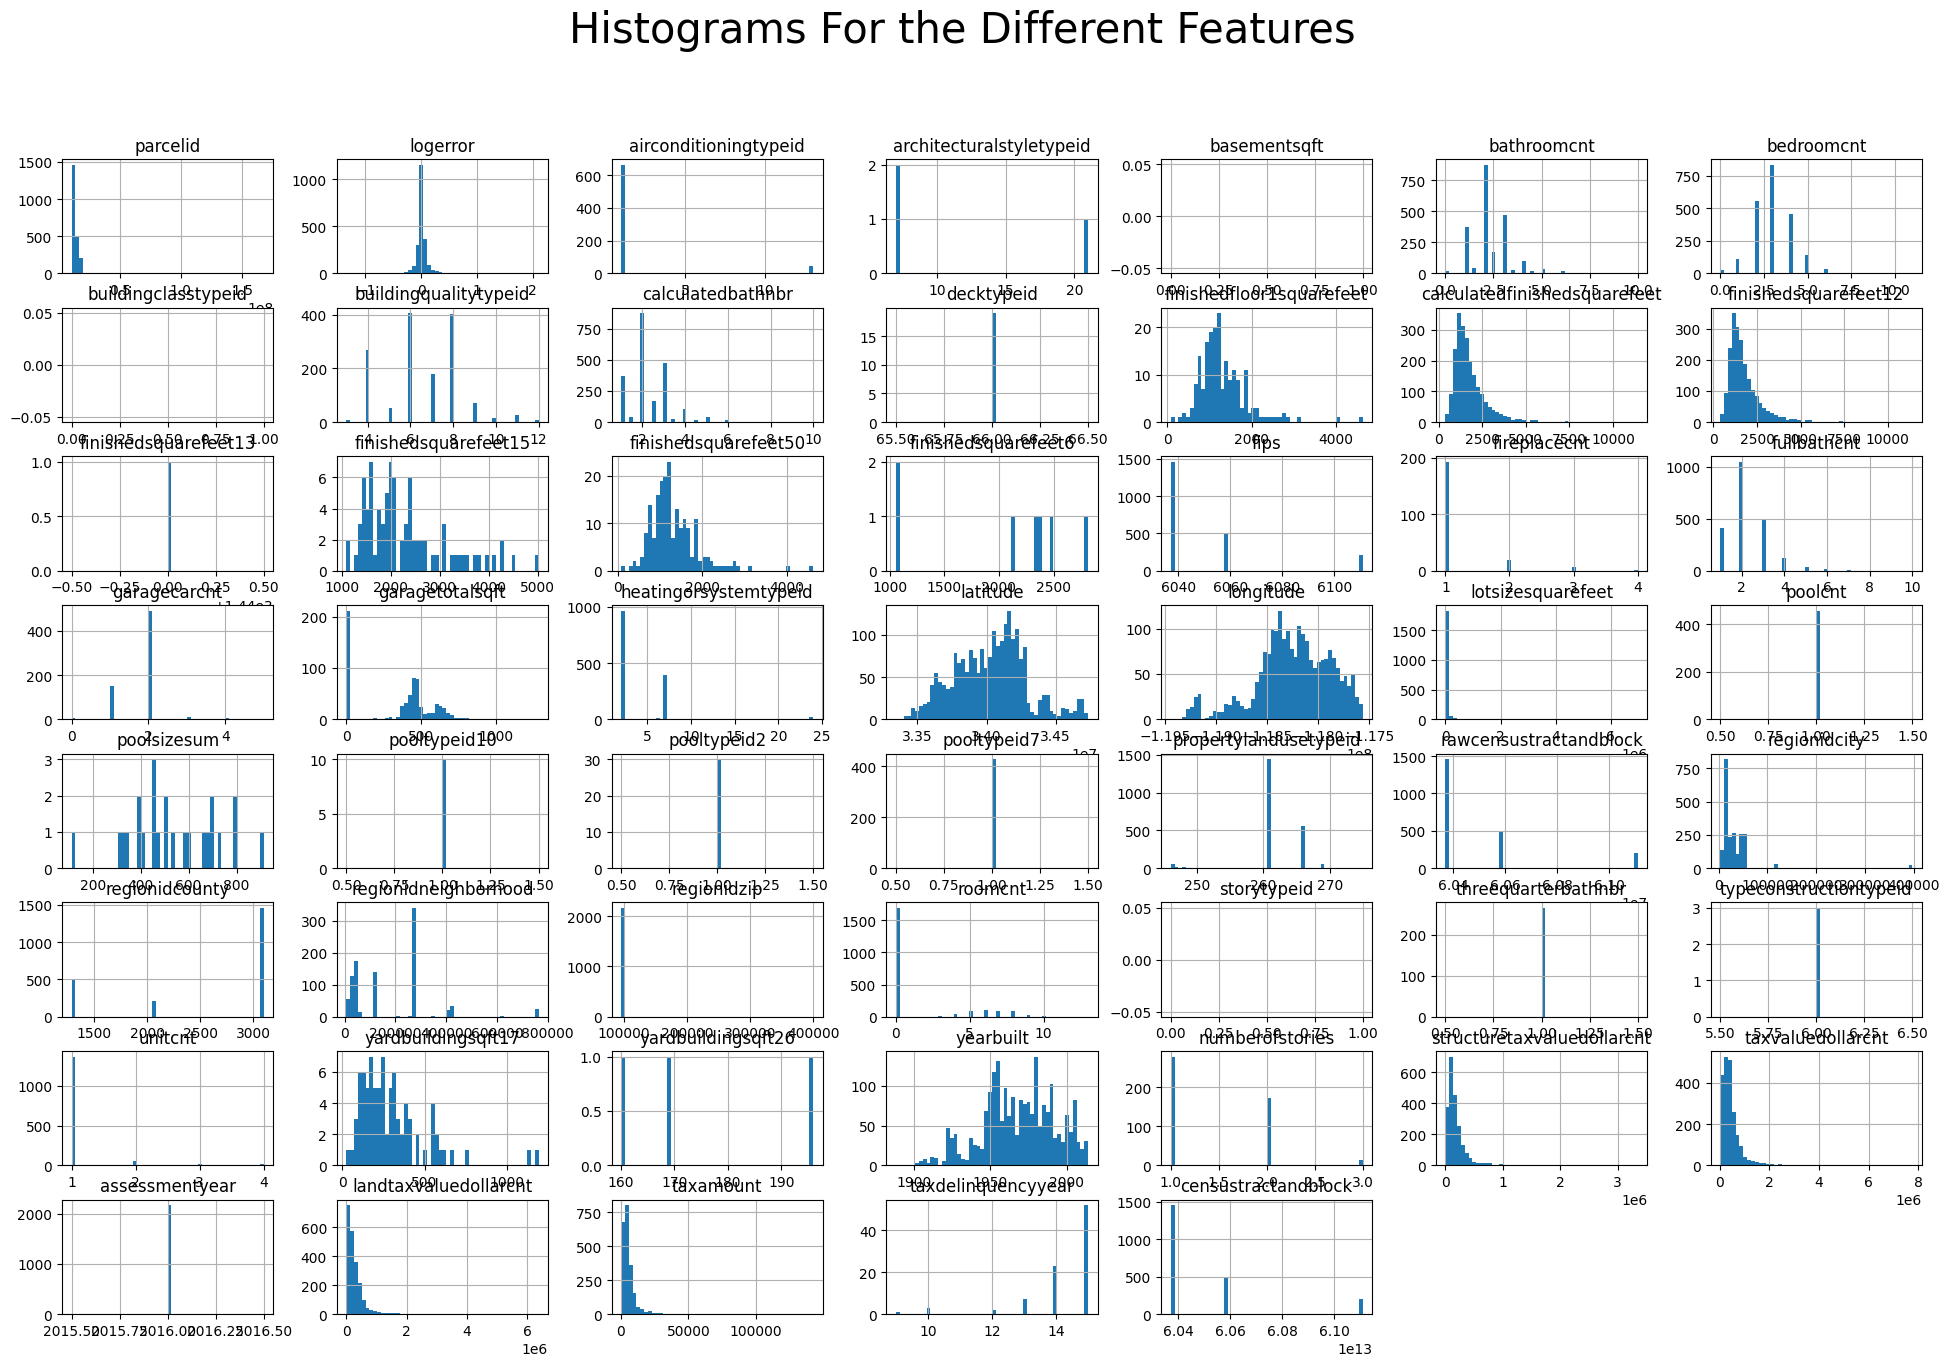

In [ ]:
train_2017.hist(bins=50, figsize=(24,15))
plt.suptitle('Histograms For the Different Features', fontsize=30)
plt.show()

Est. Descriptivas de Vbles num

In [32]:
train_2016._get_numeric_data().describe().T

,count,mean,std,min,25%,50%,75%,max
parcelid,90275.0,1.298466e+07,2.504510e+06,1.071174e+07,1.155950e+07,1.254734e+07,1.422755e+07,1.629608e+08
logerror,90275.0,1.145722e-02,1.610788e-01,-4.605000e+00,-2.530000e-02,6.000000e-03,3.920000e-02,4.737000e+00
airconditioningtypeid,28781.0,1.816372e+00,2.974168e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.300000e+01
architecturalstyletypeid,261.0,7.229885e+00,2.716196e+00,2.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00,2.100000e+01
basementsqft,43.0,7.135814e+02,4.374342e+02,1.000000e+02,4.075000e+02,6.160000e+02,8.720000e+02,1.555000e+03
bathroomcnt,90275.0,2.279474e+00,1.004271e+00,0.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,2.000000e+01
bedroomcnt,90275.0,3.031869e+00,1.156436e+00,0.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,1.600000e+01
buildingclasstypeid,16.0,4.000000e+00,0.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00
buildingqualitytypeid,57364.0,5.565407e+00,1.900602e+00,1.000000e+00,4.000000e+00,7.000000e+00,7.000000e+00,1.200000e+01
calculatedbathnbr,89093.0,2.309216e+00,9.761725e-01,1.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,2.000000e+01


In [33]:
train_2017._get_numeric_data().describe().T

,count,mean,std,min,25%,50%,75%,max
parcelid,77613.0,1.300781e+07,3.518717e+06,1.071186e+07,1.153821e+07,1.253004e+07,1.421101e+07,1.676893e+08
logerror,77613.0,1.675494e-02,1.708873e-01,-4.655420e+00,-2.432509e-02,6.670448e-03,3.929500e-02,5.262999e+00
airconditioningtypeid,25007.0,1.812013e+00,2.965768e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.300000e+01
architecturalstyletypeid,207.0,7.386473e+00,2.728030e+00,2.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00,2.100000e+01
basementsqft,50.0,6.797200e+02,6.897035e+02,3.800000e+01,2.730000e+02,5.150000e+02,7.965000e+02,3.560000e+03
bathroomcnt,77579.0,2.298496e+00,9.967317e-01,0.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,1.800000e+01
bedroomcnt,77579.0,3.053223e+00,1.140480e+00,0.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,1.600000e+01
buildingclasstypeid,15.0,3.933333e+00,2.581989e-01,3.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00
buildingqualitytypeid,49809.0,6.533779e+00,1.722062e+00,1.000000e+00,6.000000e+00,6.000000e+00,8.000000e+00,1.200000e+01
calculatedbathnbr,76963.0,2.316392e+00,9.796893e-01,1.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,1.800000e+01


Tratamiento de datos

Eliminación de las columnas con muchos datos faltantes

In [34]:
missing_percentages = train_2017.isnull().mean()
missing_percentages

parcelid                        0.000000
logerror                        0.000000
transactiondate                 0.000000
airconditioningtypeid           0.677799
architecturalstyletypeid        0.997333
basementsqft                    0.999356
bathroomcnt                     0.000438
bedroomcnt                      0.000438
buildingclasstypeid             0.999807
buildingqualitytypeid           0.358239
calculatedbathnbr               0.008375
decktypeid                      0.992089
finishedfloor1squarefeet        0.922217
calculatedfinishedsquarefeet    0.003028
finishedsquarefeet12            0.047544
finishedsquarefeet13            0.999459
finishedsquarefeet15            0.960999
finishedsquarefeet50            0.922217
finishedsquarefeet6             0.995027
fips                            0.000438
fireplacecnt                    0.893201
fullbathcnt                     0.008375
garagecarcnt                    0.671189
garagetotalsqft                 0.671189
hashottuborspa  

In [35]:
columns_to_drop = missing_percentages[missing_percentages > 0.7].index
columns_to_drop

Index(['architecturalstyletypeid', 'basementsqft', 'buildingclasstypeid',
       'decktypeid', 'finishedfloor1squarefeet', 'finishedsquarefeet13',
       'finishedsquarefeet15', 'finishedsquarefeet50', 'finishedsquarefeet6',
       'fireplacecnt', 'hashottuborspa', 'poolcnt', 'poolsizesum',
       'pooltypeid10', 'pooltypeid2', 'pooltypeid7', 'storytypeid',
       'threequarterbathnbr', 'typeconstructiontypeid', 'yardbuildingsqft17',
       'yardbuildingsqft26', 'numberofstories', 'fireplaceflag',
       'taxdelinquencyflag', 'taxdelinquencyyear'],
      dtype='object')

In [36]:
train_2017.drop(columns_to_drop, axis=1, inplace=True)

In [37]:
train_2017.shape

(77613, 35)

In [38]:
missing_percentages1 = train_2017.isnull().mean()
missing_percentages1

parcelid                        0.000000
logerror                        0.000000
transactiondate                 0.000000
airconditioningtypeid           0.677799
bathroomcnt                     0.000438
bedroomcnt                      0.000438
buildingqualitytypeid           0.358239
calculatedbathnbr               0.008375
calculatedfinishedsquarefeet    0.003028
finishedsquarefeet12            0.047544
fips                            0.000438
fullbathcnt                     0.008375
garagecarcnt                    0.671189
garagetotalsqft                 0.671189
heatingorsystemtypeid           0.361305
latitude                        0.000438
longitude                       0.000438
lotsizesquarefeet               0.106838
propertycountylandusecode       0.000438
propertylandusetypeid           0.000438
propertyzoningdesc              0.349645
rawcensustractandblock          0.000438
regionidcity                    0.019404
regionidcounty                  0.000438
regionidneighbor

Relleno de datos faltantes

In [39]:
train_2017['airconditioningtypeid'].fillna(train_2017.airconditioningtypeid.median(), inplace=True)
train_2017['bathroomcnt'].fillna(train_2017.bathroomcnt.median(), inplace=True)
train_2017['bedroomcnt'].fillna(train_2017.bedroomcnt.median(), inplace=True)
train_2017['buildingqualitytypeid'].fillna(train_2017.buildingqualitytypeid.median(), inplace=True)
train_2017['calculatedbathnbr'].fillna(train_2017.calculatedbathnbr.median(), inplace=True)
train_2017['calculatedfinishedsquarefeet'].fillna(train_2017.calculatedfinishedsquarefeet.median(), inplace=True)
train_2017['finishedsquarefeet12'].fillna(train_2017.finishedsquarefeet12.median(), inplace=True)
train_2017['fips'].fillna(train_2017.fips.median(), inplace=True)
train_2017['fullbathcnt'].fillna(train_2017.fullbathcnt.median(), inplace=True)
train_2017['garagecarcnt'].fillna(train_2017.garagecarcnt.median(), inplace=True)
train_2017['garagetotalsqft'].fillna(train_2017.garagetotalsqft.median(), inplace=True)
train_2017['heatingorsystemtypeid'].fillna(train_2017.heatingorsystemtypeid.median(), inplace=True)
train_2017['latitude'].fillna(train_2017.latitude.median(), inplace=True)
train_2017['longitude'].fillna(train_2017.longitude.median(), inplace=True)
train_2017['finishedsquarefeet12'].fillna(train_2017.finishedsquarefeet12.median(), inplace=True)
train_2017['lotsizesquarefeet'].fillna(train_2017.lotsizesquarefeet.median(), inplace=True)
#train_2017['propertycountylandusecode'].fillna(train_2017.propertycountylandusecode.median(), inplace=True)
train_2017['propertylandusetypeid'].fillna(train_2017.propertylandusetypeid.median(), inplace=True)
#train_2017['propertyzoningdesc'].fillna(train_2017.propertyzoningdesc.median(), inplace=True)
train_2017['rawcensustractandblock'].fillna(train_2017.rawcensustractandblock.median(), inplace=True)
train_2017['regionidcity'].fillna(train_2017.regionidcity.median(), inplace=True)
train_2017['regionidcounty'].fillna(train_2017.regionidcounty.median(), inplace=True)
train_2017['regionidneighborhood'].fillna(train_2017.regionidneighborhood.median(), inplace=True)
train_2017['regionidzip'].fillna(train_2017.regionidzip.median(), inplace=True)
train_2017['roomcnt'].fillna(train_2017.roomcnt.median(), inplace=True)
train_2017['unitcnt'].fillna(train_2017.unitcnt.median(), inplace=True)
train_2017['yearbuilt'].fillna(train_2017.yearbuilt.median(), inplace=True)
train_2017['structuretaxvaluedollarcnt'].fillna(train_2017.structuretaxvaluedollarcnt.median(), inplace=True)
train_2017['taxvaluedollarcnt'].fillna(train_2017.taxvaluedollarcnt.median(), inplace=True)
train_2017['assessmentyear'].fillna(train_2017.assessmentyear.median(), inplace=True)
train_2017['landtaxvaluedollarcnt'].fillna(train_2017.landtaxvaluedollarcnt.median(), inplace=True)
train_2017['taxamount'].fillna(train_2017.taxamount.median(), inplace=True)
train_2017['censustractandblock'].fillna(train_2017.censustractandblock.median(), inplace=True)

In [40]:
missing_percentages2 = train_2017.isnull().mean()
missing_percentages2

parcelid                        0.000000
logerror                        0.000000
transactiondate                 0.000000
airconditioningtypeid           0.000000
bathroomcnt                     0.000000
bedroomcnt                      0.000000
buildingqualitytypeid           0.000000
calculatedbathnbr               0.000000
calculatedfinishedsquarefeet    0.000000
finishedsquarefeet12            0.000000
fips                            0.000000
fullbathcnt                     0.000000
garagecarcnt                    0.000000
garagetotalsqft                 0.000000
heatingorsystemtypeid           0.000000
latitude                        0.000000
longitude                       0.000000
lotsizesquarefeet               0.000000
propertycountylandusecode       0.000438
propertylandusetypeid           0.000000
propertyzoningdesc              0.349645
rawcensustractandblock          0.000000
regionidcity                    0.000000
regionidcounty                  0.000000
regionidneighbor

Modelo


In [41]:
logerror_zero = list(train_2017[train_2017.logerror == 0].index) #lista con los indices de los valores que tienen lecturas 0
logerror_zero

[]

In [42]:
print(train_2017.dtypes)

parcelid                          int64
logerror                        float64
transactiondate                  object
airconditioningtypeid           float64
bathroomcnt                     float64
bedroomcnt                      float64
buildingqualitytypeid           float64
calculatedbathnbr               float64
calculatedfinishedsquarefeet    float64
finishedsquarefeet12            float64
fips                            float64
fullbathcnt                     float64
garagecarcnt                    float64
garagetotalsqft                 float64
heatingorsystemtypeid           float64
latitude                        float64
longitude                       float64
lotsizesquarefeet               float64
propertycountylandusecode        object
propertylandusetypeid           float64
propertyzoningdesc               object
rawcensustractandblock          float64
regionidcity                    float64
regionidcounty                  float64
regionidneighborhood            float64


In [43]:
var_categoricas = ["propertyzoningdesc", "propertycountylandusecode"]
encoder = preprocessing.LabelEncoder()

for i in var_categoricas:
    
    train_2017[i] = encoder.fit_transform(train_2017[i])
    
print (train_2017.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77613 entries, 0 to 77612
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      77613 non-null  int64  
 1   logerror                      77613 non-null  float64
 2   transactiondate               77613 non-null  object 
 3   airconditioningtypeid         77613 non-null  float64
 4   bathroomcnt                   77613 non-null  float64
 5   bedroomcnt                    77613 non-null  float64
 6   buildingqualitytypeid         77613 non-null  float64
 7   calculatedbathnbr             77613 non-null  float64
 8   calculatedfinishedsquarefeet  77613 non-null  float64
 9   finishedsquarefeet12          77613 non-null  float64
 10  fips                          77613 non-null  float64
 11  fullbathcnt                   77613 non-null  float64
 12  garagecarcnt                  77613 non-null  float64
 13  g